# These commands to be run in command prompt to install libraries
#pip install opencv-python
#pip install imagehash
#pip install pandas
#pip install CMake
#pip install face_recognition
#pip install matplotlib

In [4]:
# Import libraries into the environment
import cv2
from itertools import chain
import random
import collections
import imagehash
import pandas as pd
import numpy as np
from PIL import Image, ImageStat
import os
import sys
import face_recognition
from matplotlib import pyplot

#### First Step

In [51]:
# read image_names in a list
img_list = os.listdir("C:\\Users\\Users 4\\Desktop\\imgs")

# Convert this list into a dataframe
df = pd.DataFrame(img_list)
df.rename(columns = {0:'image_name'}, inplace=True)
# allocate each row i.e. image name a unique id
df['img_id'] = df.reset_index().index + 1

## find duplicates
# Find hash value of each image
img_h = {x: imagehash.average_hash(Image.open(os.path.join('C:/Users/Users 4/Desktop/imgs/', x)), hash_size = 16) for x in img_list}
# make a new column in dataframe based on these hash values
df['hash'] = df['image_name'].map(img_h)
# Following code will create a new column 'dup_id' in dataframe having same id for each duplicate image
# thus we will have a count of unique images
new_dict = {}
for key, value in img_h.items():
   if value in new_dict:
       new_dict[value].append(key)
   else:
       new_dict[value]=[key]
new_d2 = {k:i for i, (k, v) in enumerate(new_dict.items())}
df['dup_id'] = df['hash'].map(new_d2)
df['dup_id'] = df.groupby('dup_id').ngroup() +1
df



,image_name,img_id,hash,dup_id
0,download (1).jfif,1,ff07c01bd01ff86be0478047801f800f800f001f003f00...,1
1,download.jfif,2,100700c100c300c300c30003000307c307fb0103000301...,2
2,IMG20220101153026_00.jpg,3,00f80078087e073f07ff03ff01ff007f003f001f001f00...,3
3,IMG20220623105846_00.jpg,4,ffffffff7fff7f7f80ffff3ffe190c00073007f061f8c1...,4
4,IMG20220623105901_00 - Copy.jpg,5,fffbf803f0030e0f021f031f033ec1ee0004007840ffff...,5
5,IMG20220623105901_00.jpg,6,fffbf803f0030e0f021f031f033ec1ee0004007840ffff...,5
6,IMG20220623105921_00 - Copy.jpg,7,e00fc000f804ff80fff3fcf3f843c3c0c7e087c003c003...,6
7,IMG20220623105921_00.jpg,8,e00fc000f804ff80fff3fcf3f843c3c0c7e087c003c003...,6
8,IMG20220623105950_00 - Copy.jpg,9,ffdf7fdfffa0f8c238c3003f60033006200e381c80fbf0...,7
9,IMG20220623105950_00.jpg,10,ffdf7fdfffa0f8c238c3003f60033006200e381c80fbf0...,7


In [52]:
# Create a new data frame df1 with each unique image only, so that
# we can proceed with a small set of data; and
# eliminate duplicate images in this step only
df1 = df.groupby('dup_id').apply(lambda x: x.sample(1)).reset_index(drop=True)

# print result summary of step-1
print(f'We have found only {df1.shape[0]} unique images out of given {df.shape[0]} images')
df1

We have found only 30 unique images out of given 50 images


,image_name,img_id,hash,dup_id
0,download (1).jfif,1,ff07c01bd01ff86be0478047801f800f800f001f003f00...,1
1,download.jfif,2,100700c100c300c300c30003000307c307fb0103000301...,2
2,IMG20220101153026_00.jpg,3,00f80078087e073f07ff03ff01ff007f003f001f001f00...,3
3,IMG20220623105846_00.jpg,4,ffffffff7fff7f7f80ffff3ffe190c00073007f061f8c1...,4
4,IMG20220623105901_00 - Copy.jpg,5,fffbf803f0030e0f021f031f033ec1ee0004007840ffff...,5
5,IMG20220623105921_00 - Copy.jpg,7,e00fc000f804ff80fff3fcf3f843c3c0c7e087c003c003...,6
6,IMG20220623105950_00 - Copy.jpg,9,ffdf7fdfffa0f8c238c3003f60033006200e381c80fbf0...,7
7,IMG20220623105954_00.jpg,12,ffde7fdf7fe4f8a038c3010760037004200d703880f7e1...,8
8,IMG20220623110004_00.jpg,14,f39ff38ffffffffc0e3d3e271e02e800c004001c843e00...,9
9,IMG20220623110015_00 - Copy.jpg,16,fffffffffdeffcfffc6ffc648c34f83f38180033003300...,10


#### Second Step - Count and detect faces

In [53]:
# encode face in each image
face_encodings = [face_recognition.face_encodings(face_recognition.load_image_file(img)) for img in list('C:/Users/Users 4/Desktop/imgs/'+ df1['image_name'])]
faces_count = [len(enc) for enc in face_encodings]
df1['faces_count'] = faces_count
no_faces_count = df1[df1['faces_count'] !=1].shape[0]
unique_images_count = df1.shape[0]
im_for_face_comp = unique_images_count - no_faces_count

# print result summary
print(f'AI Model could not detect any face or has detected multiple faces in {no_faces_count} images')
print(f'Thus next we will work on {im_for_face_comp} images, which have exactly one face, for face comparision')
df1

AI Model could not detect any face or has detected multiple faces in 9 images
Thus next we will work on 21 images, which have exactly one face, for face comparision


,image_name,img_id,hash,dup_id,faces_count
0,download (1).jfif,1,ff07c01bd01ff86be0478047801f800f800f001f003f00...,1,0
1,download.jfif,2,100700c100c300c300c30003000307c307fb0103000301...,2,0
2,IMG20220101153026_00.jpg,3,00f80078087e073f07ff03ff01ff007f003f001f001f00...,3,0
3,IMG20220623105846_00.jpg,4,ffffffff7fff7f7f80ffff3ffe190c00073007f061f8c1...,4,1
4,IMG20220623105901_00 - Copy.jpg,5,fffbf803f0030e0f021f031f033ec1ee0004007840ffff...,5,0
5,IMG20220623105921_00 - Copy.jpg,7,e00fc000f804ff80fff3fcf3f843c3c0c7e087c003c003...,6,1
6,IMG20220623105950_00 - Copy.jpg,9,ffdf7fdfffa0f8c238c3003f60033006200e381c80fbf0...,7,1
7,IMG20220623105954_00.jpg,12,ffde7fdf7fe4f8a038c3010760037004200d703880f7e1...,8,1
8,IMG20220623110004_00.jpg,14,f39ff38ffffffffc0e3d3e271e02e800c004001c843e00...,9,1
9,IMG20220623110015_00 - Copy.jpg,16,fffffffffdeffcfffc6ffc648c34f83f38180033003300...,10,1


In [54]:
# modify data frame with 1 face and make a new dataframe df2
df2 = df1[df1['faces_count']==1]
df2 = df2.drop(columns=['hash'])
df2.reset_index(inplace=True)

In [55]:
# make a dictionary of each face encoding in df2
face_encodings_r = [enc for enc in face_encodings if len(enc) ==1]
face_enc_dict = dict(zip(list(df2.dup_id), face_encodings_r))

In [56]:
# input parameters here
face_enc_dict = dict(zip(list(df2.dup_id), face_encodings_r))
tolerance = 0.48
# input a face id
face_id = 1
face_dict = {}

# while loop to detect same face in each image
while len(list(face_enc_dict.keys())) > 0:
    main_img_id = list(face_enc_dict.keys())[0]
    main_img = face_enc_dict.pop(main_img_id)
    main_img_enc = main_img[0]
    my_lst = [main_img_id]
    for img_id, enc in face_enc_dict.items():
        if face_recognition.compare_faces([main_img_enc], enc[0], tolerance=tolerance)[0]:
            my_lst.append(img_id)
    face_dict[face_id] = my_lst                   
    face_enc_dict = dict([(k, v) for k, v in face_enc_dict.items() if k not in my_lst])
    
    my_lst = []
    face_id += 1
    
# print summary of unique faces
    unique_faces = len(face_dict)
print(f'we finally found {unique_faces} unique faces only')

we finally found 6 unique faces only


In [58]:
#Print results of each duplicate face
face_dict2 = {value : key for key in face_dict for value in face_dict[key]}
df2['face_id'] = df2.dup_id.map(face_dict2)

In [59]:
face_dict

{1: [4, 6],
 2: [7, 8, 9, 10, 24, 26, 28, 29, 30],
 3: [11, 12, 13, 21],
 4: [14, 15],
 5: [16, 17, 19],
 6: [20]}

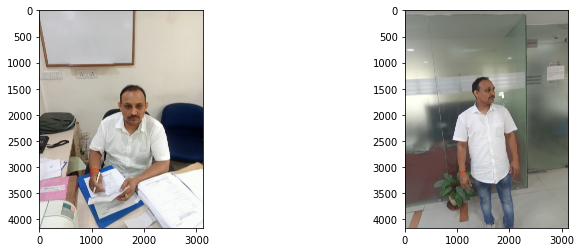

In [62]:
file_names = ['C:/Users/Users 4/Desktop/imgs/'+ img for img in df2[df2.face_id == 1].image_name]
# create subplots instances
fig, axes = pyplot.subplots(1,len(file_names), figsize=(12,4))

for name, ax in zip(file_names, axes.ravel()):
  image = cv2.imread(name)

  # plot image into the subplot
  ax.imshow(image[:,:,::-1])

# THANK YOU